# Day 11 In-Class: Overview of data and file formats; US Population and Representation

### <p style="text-align: right;"> &#9989; Cesarine Graham, Team Partners: Bella, Tori, Allie, Olivia

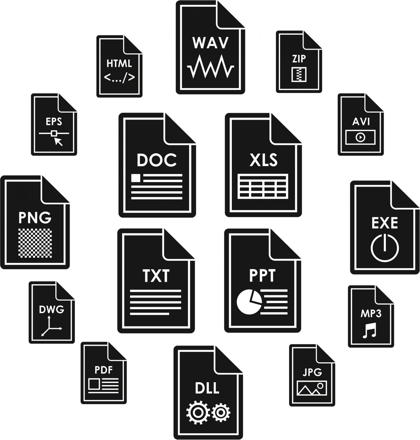

## Learning Goals:

By the end of this assignment you should be able to:
- Review some basics of file formats
- Load in a variety of file formats
- Clean data loaded from files
- Practice using online research to learn new programming skills
- Sort arrays and dataframes by their values

### File Formats Review

As discussed in the pre-class, there are thousands of accepted file formats.  For an abbreviated list, see this [summary on wikipedia](https://en.wikipedia.org/wiki/List_of_file_formats).

In general, all computer files store information as a series of bits (binary 1's and 0's).  Typically 8 bits are combined into a single byte.  All files can be categorized as:
- **Text files**: where the bytes represent characters using a standard encoding scheme like UTF-8. 
- **Binary files**: where the bytes represent a custom organization of information.  A single binary files can information encoded as strings, floats, and/or ints.  

Refer back to the pre-class for tips on how to identify file types and the key information in order to load data from a text file (ex: delimiter, line feed, encoding, etc).  

----

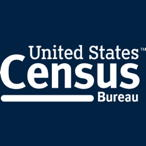

## Part 1. Load data files

Download all of the files that start with `us_pop_by_state*`. These files contain population estimates from the US Census. (For population estimates methodology statements, see http://www.census.gov/programs-surveys/popest/technical-documentation/methodology.html.)  The US Census has a fascinating 230 year history (https://www.census.gov/history/).

&#9989;&nbsp; Using the information you found in the pre-class, load all of these files into pandas data frames.  When successful, you should have the population of all states in the US for 2010 through 2019 stored in pandas data frames. There are some hints and/or suggestions embedded in the comments in the cells below.

In [1]:
# import all necessary modules (matplotlib, numpy, pandas)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# import the pandas module
import pandas as pd


In [2]:
# Load us_pop_by_state_2010_2011

pop1011 = pd.read_csv("us_pop_by_state_2010_2011.csv",delimiter=';')

### 1.1 Loading UTF-16be Data

Load us_pop_by_state_2012_2013_encoding_utf-16be (See tips in pre-class if having trouble)

In [3]:
# Load us_pop_by_state_2012_2013_encoding_utf-16be

pop1213 = pd.read_csv("us_pop_by_state_2012_2013_encoding_utf-16be.csv", 
                      skiprows=0, encoding='utf-16be', delimiter=',', thousands=',')

### 1.2 Loading Windows Linefeed Data

Load `us_pop_by_state_2014_2015_windows_linefeed` 

**Tip:** This file needs to be cleaned/edited some before loading; 

**Hint:** *What is the delimiter for this file?  How could that lead to trouble?*

In [4]:
# Load us_pop_by_state_2014_2015_windows_linefeed 

pop1415 = pd.read_csv("us_pop_by_state_2014_2015_windows_linefeed.csv", skiprows=1, delimiter=' ')

### 1.3 Loading Binary Data

Below is an example of how to load a .csv binary file using Numpy.

In [5]:
# Load binary file with numpy
pop16 = np.fromfile('us_pop_by_state_2016a.csv', dtype='float32') # Population of all states in 2016

That's a binary file, with one number per state in alphabetical order (same order as other files)

Now you try loading the binary data file `us_pop_by_state_2017a.yaff` This file has a 32-bit data type as well, but it is 32-bit integers instead. Try `dtype='int32'` when you load in the data!

In [6]:
# Load "us_pop_by_state_2017a.yaff"

pop17 = np.fromfile('us_pop_by_state_2017a.yaff', dtype='int32') # Population of all states in 2017

### 1.4 Loading the Rest

Read following code and ensure you understand what is happening

In [7]:
# Load us_pop_by_state_2018_2019.bin
pop1819 = np.fromfile('us_pop_by_state_2018_2019.bin', dtype='int32') 
print('Size pop1819:',pop1819.shape)
pop18 = pop1819[0:51]   # Population of all states in 2018
pop19 = pop1819[51:102] # Population of all states in 2019


Size pop1819: (102,)


**Question:** How is the `pd.read_csv()` function different from the `np.fromfile()` function?  Discuss with your group members and put your answer below.

<font size=+3>&#9998;</font> for pd.read_csv() are for normal text files and np.fromfile() are for binary files. 

---

## An aside: Sorting and finding max/min values in numpy arrays

Now let's equip ourselves with some new tools that can be used to answer some of the questions below.  In a numpy array, you might already know that we can find the maximum and minimum values like so:

In [8]:
a = np.array([2,30,111,41,9,16,17,2,1,-6,33])
print('The biggest value of a is:',a.max())
print('The smallest value of a is:',a.min())

The biggest value of a is: 111
The smallest value of a is: -6


But did you know we can also find out *where* the biggest and smallest entries are?  We can do this with `.argmin()` and `.argmax()`:

In [9]:
print('The biggest value of a is in position:',a.argmax())
print('The smallest value of a is in position:',a.argmin())

The biggest value of a is in position: 2
The smallest value of a is in position: 9


Similarly, we can sort an array like this:

In [10]:
a.sort()
print(a)

[ -6   1   2   2   9  16  17  30  33  41 111]


But this doesn't always give us the information we need.  In fact, note that this changes our array!  

Sometimes we just want to know the *indices that are required to sort the array*.  We can get these with `.argsort()`:

In [11]:
a = np.array([2,30,111,41,9,16,17,2,1,-6,33])

sorting_indices = a.argsort()
sorted_a = a[sorting_indices] #masking

print('Sorting indices:', sorting_indices)
print('Sorted array:',sorted_a)

Sorting indices: [ 9  8  0  7  4  5  6  1 10  3  2]
Sorted array: [ -6   1   2   2   9  16  17  30  33  41 111]


Note that the first element of `sorting_indices` is 9, and the last one is 2, which is what we should expect.  

**Using `.argsort()` is similar to defining a mask.** Once you have these indices, you can use them to select particular indices of an array or a dataframe.  The difference is that a **mask allows you to select a different subset of the data** but the **`sorting_indices` allow you to select the same data but in a different order**.

___
## Part 2. Analyze and visualize data

&#9989;&nbsp; **Question 2.1** Determine which state had the greatest percent increase in population between 2010 to 2019.  Work with your team members to break this into subproblems and find the solution.  Print the answer as:

`The great state of ____ had a ___% increase in population between 2010 and 2019.`  

In [12]:
# Put your code here

#these are the arrays for the years we need
pop1011
pop19

#finding the percentage difference of each of the states
p_dif = (pop19 - pop1011['2010'])/(pop1011['2010'])*100.0

#finding the state with the greatest change
print('The biggest percentage difference in population is from:',p_dif.argmax())
#value = np.argmax(p_dif)
print("the great state of",pop1011["State"][8], "had a" , p_dif.max(), "% increase in population between 2010 and 2019")

The biggest percentage difference in population is from: 8
the great state of District of Columbia had a 15.914881383152741 % increase in population between 2010 and 2019


&#9989;&nbsp; **Question 2.2** Determine which state had the second greatest percent increase in population from 2010 to 2019.  Work with your team members to break this into subproblems and to find the solution using python.  Print the answer as:

`The great state of ____ had a ___% increase between 2010 and 2019.`  

In [13]:
# Put your code here

indices = p_dif.argsort()
second_p_dif = p_dif[indices]
second_p_dif

print("the great state of",pop1011["State"][44], "had a" ,second_p_dif[44], "% increase in population between 2010 and 2019")

the great state of Utah had a 13.627847046767737 % increase in population between 2010 and 2019


In [14]:
#the alternative method but not the most effective bc it overwrties data

#p_dif[8] = 0
#finding the state with the greatest change
#print('The biggest percentage difference in population is from:',p_dif.argmax())
#value = np.argmax(p_dif)
#print("the great state of",pop1011["State"][44], "had a" , p_dif.max(), "% increase in population between 2010 and 2019")

&#9989;&nbsp; **Question 2.3** Make a plot of the population in 2019 versus the states (i.e. the state names should be on the x-axis). Order the states from the least populous to the most populous for the year 2019. Label all of your axes.  (Try to change figure size and the x-tick label to permit visualization of all the state names).

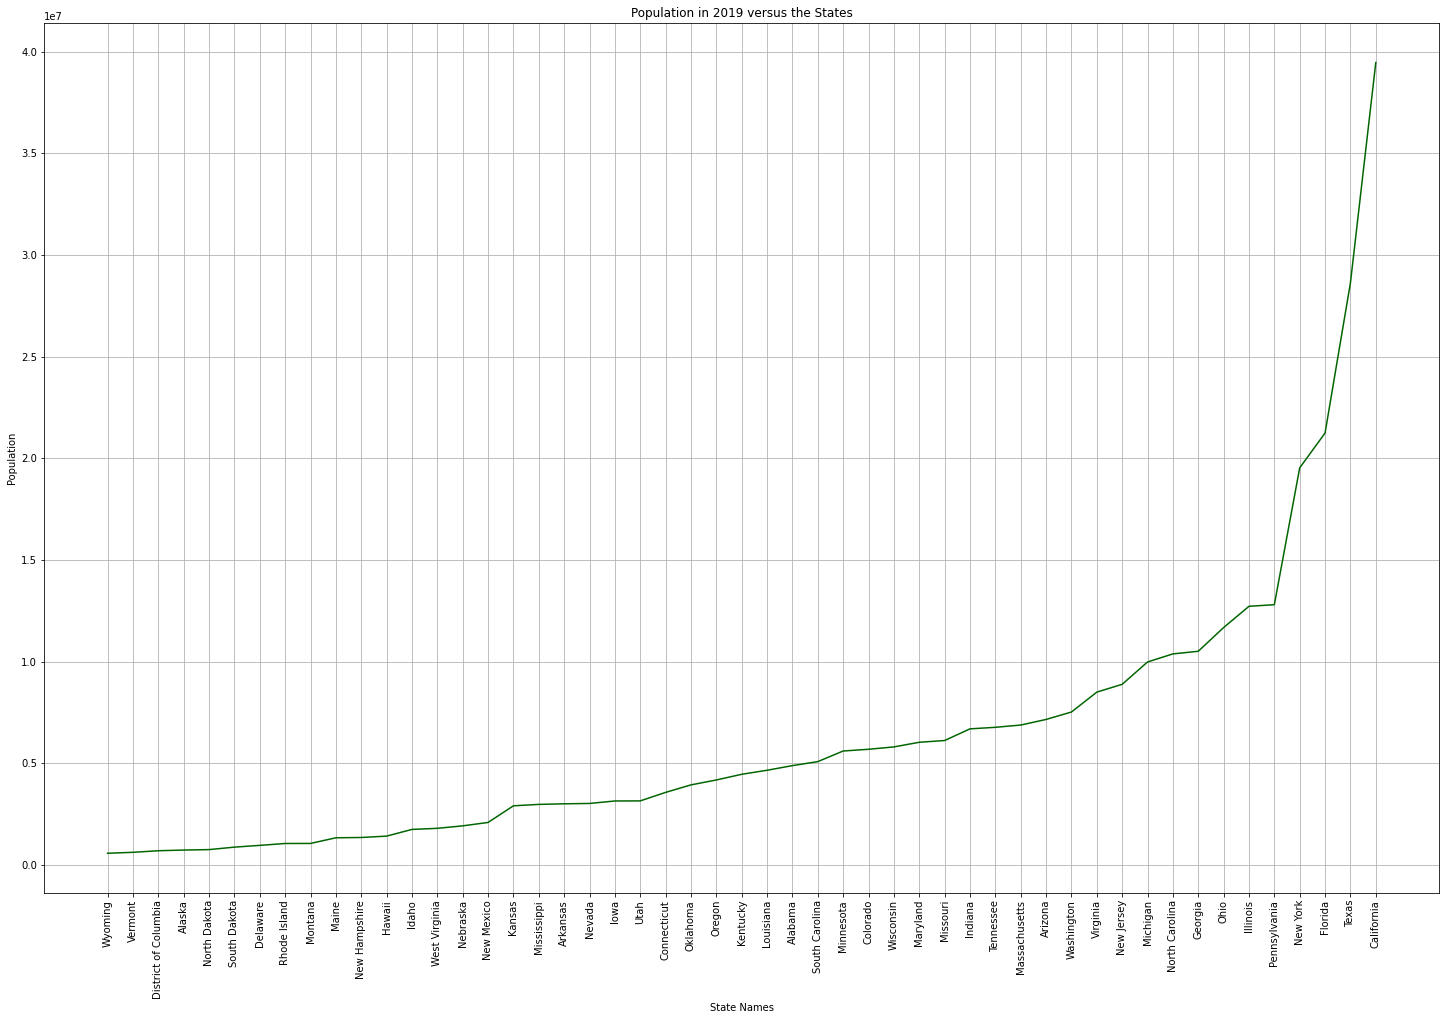

In [15]:
# Put your code here

sorting_indices = np.argsort(pop19)
sorted_pop19 = pop19[sorting_indices]
sorted_states = pop1011["State"][sorting_indices]

plt.figure(figsize=(25,16))

plt.plot(sorted_states,sorted_pop19,color = 'darkgreen')
plt.title('Population in 2019 versus the States')
plt.xlabel('State Names')
plt.xticks(rotation=90)
plt.ylabel('Population')
plt.grid()


&#9989;&nbsp; **Question 2.4** Make a plot of the 2019 population versus only the 10 most populous states. On the x-axis include the name of the state.   Order the states from the least populous to the most populous for the year 2019. Label all of your axes.

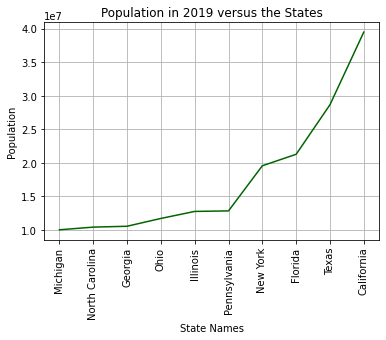

In [22]:
# Put your code here

sorting_indices = np.argsort(pop19)
sorted_pop19 = pop19[sorting_indices][41:]
sorted_states = pop1011["State"][sorting_indices][41:]

plt.plot(sorted_states,sorted_pop19,color = 'darkgreen')
plt.title('Population in 2019 versus the States')
plt.xlabel('State Names')
plt.xticks(rotation=90)
plt.ylabel('Population')
plt.grid()

---

### &#128721; STOP
Check in with an instructor before you leave class!

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [17]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---


## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload it there. Make sure your name is on it.

See you next class!

Copyright &#169; 2021, [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu/) at Michigan State University, All rights reserved.